# Clasificación de actores

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import seaborn as sn

# Gráficos
import matplotlib.pyplot as plt

# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

### Análisis de datos

Leemos nuestro conjunto de datos.

In [2]:
df = pd.read_csv('actores_2005_2016.csv', index_col=0)

Visualizamos parte de nuestro dataset

In [3]:
df.head(10)

,Title,Release.Date,Primary.Genre,Actors,acum_real
3,Prom Night,08/08/2008,Horror,"Andrew Fiscella, Brittany Snow, Collins Pennie...",1.639486e+07
4,Sweeney Todd,02/08/2008,Musical,"Alan Rickman, Christopher Lee, Helena Bonham C...",2.525274e+07
9,Wes Craven Presents: They,10/28/2005,Horror,"Dagmara Dominczyk, Ethan Embry, Jon Abrahams, ...",1.682637e+07
15,Texas Chainsaw Massacre (2003),04/01/2005,Horror,"Erica Leerhsen, Eric Balfour, Jessica Biel, Jo...",1.752386e+07
17,Lemony Snicket's A Series Of Unfortun...,01/14/2005,Adventure,"Billy Connolly, Catherine O'Hara, Craig Fergus...",4.044608e+07
25,Sylvia (2003),02/25/2005,Drama,"Amira Casar, Andrew Havill, Blythe Danner, Dan...",1.032586e+06
28,Ultimo tango a Parigi,11/08/2016,Drama,"Jean-Pierre LÃ©aud, Maria Schneider, Marlon Br...",1.131300e+05
29,Mission: Impossible III (2006),05/05/2006,Action,"Aaron Paul, Billy Crudup, Jonathan Rhys Meyers...",1.004637e+08
34,First Daughter,04/29/2005,Romantic Comedy,"Amerie Rodgers, Katie Holmes, Lela Rochon Fuqu...",4.650609e+06
41,Robots,03/11/2005,Animation,"Amanda Bynes, Drew Carey, Ewan McGregor, Giann...",1.172682e+08


In [4]:
df.shape

(1707, 5)

In [5]:
df.isnull().sum()

Title             0
Release.Date      0
Primary.Genre    21
Actors           99
acum_real         0
dtype: int64

Como queremos clasificar de alguna forma a los actores, entonces es conveniente hacer un *split* de la lista de los actores de cada una de las películas, de manera que en la columna *Actors* sólo haya un valor por fila.

In [6]:
# Convertimos en una lista la columna Actors.
df['Actors'] = df['Actors'].str.split(',')

# Convertimos la lista en un DataFrame y luego la apilamos en una lista.
update_df = (df
             .set_index(['Title','Release.Date','Primary.Genre','acum_real'])['Actors']
             .apply(pd.Series)
             .stack()
             .reset_index()
             .drop('level_4', axis=1)
             .rename(columns={0:'Actors'}))

In [7]:
update_df

,Title,Release.Date,Primary.Genre,acum_real,Actors
0,Prom Night,08/08/2008,Horror,16394856.0,Andrew Fiscella
1,Prom Night,08/08/2008,Horror,16394856.0,Brittany Snow
2,Prom Night,08/08/2008,Horror,16394856.0,Collins Pennie
3,Prom Night,08/08/2008,Horror,16394856.0,Idris Elba
4,Prom Night,08/08/2008,Horror,16394856.0,Jessica Stroup
...,...,...,...,...,...
13221,Tiempo de morir,09/09/2016,Western,21100.0,Blanca Sanchez
13222,Tiempo de morir,09/09/2016,Western,21100.0,Enrique Rocha
13223,Tiempo de morir,09/09/2016,Western,21100.0,Jorge Martinez de Hoyos
13224,Tiempo de morir,09/09/2016,Western,21100.0,Marga Lopez


Notemos que por obvias razones, el número de filas del dataset aumenta.

In [8]:
update_df.shape

(13226, 5)

In [9]:
update_df.isnull().sum()

Title             0
Release.Date      0
Primary.Genre    78
acum_real         0
Actors            0
dtype: int64

Ahora bien, contamos el número de entradas en cada una de las columnas Actors, Genre y Date, pues por lo dataset original podemos inferir que hay $1707$ películas diferentes.

* Contamos el número de actores.

In [10]:
count_actors = update_df.groupby(['Actors']).size().reset_index(name='Count')

In [11]:
count_actors.head(5)

,Actors,Count
0,'Ashanti' Douglas,1
1,Aasif Mandvi,1
2,Abel Lopez Marroquin,1
3,Abigail Breslin,1
4,Adam Beach,1


In [12]:
count_actors.shape

(6829, 2)

Por lo tanto, hay un total de $6829$ actores distintos.

* Contamos el número de géneros.

In [13]:
count_genre = update_df.groupby(['Primary.Genre']).size().reset_index(name='Count')

In [14]:
count_genre.head(5)

,Primary.Genre,Count
0,Action,2151
1,Adventure,633
2,Animation,1047
3,Comedy,3137
4,Documentary,98


In [15]:
count_genre.shape

(14, 2)

Por lo tanto, hay un total de $14$ géneros distintos.

* Contamos el número de fechas.

In [16]:
count_date = update_df.groupby(['Release.Date']).size().reset_index(name='Count')

In [17]:
count_date.head(5)

,Release.Date,Count
0,01/01/2010,16
1,01/01/2015,37
2,01/01/2016,39
3,01/03/2014,29
4,01/04/2008,11


In [18]:
count_date.shape

(644, 2)

Por lo tanto, hay un total de $644$ fechas distintas.

* Contamos el número de acum_real.

In [19]:
count_acum_real = update_df.groupby(['acum_real']).size().reset_index(name='Count')

In [20]:
count_acum_real.head(5)

,acum_real,Count
0,1680.0,10
1,9064.0,6
2,10670.0,13
3,10990.0,11
4,12433.0,10


In [21]:
count_acum_real.shape

(1608, 2)

Por lo tanto, hay un total de $1608$ val_real distintos.

### Preprocesamiento de datos

Normalizamos las columnas **Release.Date**, **Primary.genre** y **Actors**, pues estos datos aún no se encuentran en algún formato númerico y **k-means** (el algoritmo que usaremos para agrupar) no trabaja con variables categóricas.

Por lo tanto, tenemos que crear variables ficticias para la fecha, el género y los actores (omitimos la columna del nombre pues sólo sirve como un identificador y no es útil para la agrupación).

Para crear estas variables ficticias usaremos la función **get_dummies**, la cual permite eliminar la primera de las columnas generadas para cada característica codificada para evitar la denominada colinealidad (que una de las características sea una combinación lineal de las otras), lo que dificulta el correcto funcionamiento de los algoritmos. Para ello disponemos del argumento drop_first.

Una vez creadas las **variables dummies**, solo tendríamos que sustituir la característica original en el dataset por las creadas.

In [22]:
# Creamos las variables dummies.
dummy_variables = pd.get_dummies(update_df[['Actors','Release.Date','Release.Date']])

In [23]:
# Concatenamos las variables dummies al dataset original
df_dummy = pd.concat([update_df,dummy_variables],axis=1)

In [24]:
df_dummy.head(5)

,Title,Release.Date,Primary.Genre,acum_real,Actors,Actors_ 'Ashanti' Douglas,Actors_ Aasif Mandvi,Actors_ Abel Lopez Marroquin,Actors_ Abigail Breslin,Actors_ Adam Beach,...,Release.Date_12/25/2014,Release.Date_12/25/2015,Release.Date_12/25/2016,Release.Date_12/27/2012,Release.Date_12/28/2007,Release.Date_12/29/2005,Release.Date_12/29/2006,Release.Date_12/29/2011,Release.Date_12/29/2016,Release.Date_12/30/2010
0,Prom Night,08/08/2008,Horror,16394856.0,Andrew Fiscella,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Prom Night,08/08/2008,Horror,16394856.0,Brittany Snow,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Prom Night,08/08/2008,Horror,16394856.0,Collins Pennie,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Prom Night,08/08/2008,Horror,16394856.0,Idris Elba,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Prom Night,08/08/2008,Horror,16394856.0,Jessica Stroup,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Eliminamos las variables categóricas del dataset df_dummy
df_dummy = df_dummy.drop(['Title','Release.Date','Primary.Genre','Actors'], axis=1)

Por otro lado, como todas nuestras variables son númericas, podemos normalizar nuestro dataset.

In [30]:
# Creamos un arreglo con todos los valores del dataset.
df_values = df_dummy.values

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_values)

Creamos un DataFrame con los valores normalizados.

In [33]:
df_scaled = pd.DataFrame(X_scaled, columns=df_dummy.columns)

In [34]:
df_scaled.head(5)

,acum_real,Actors_ 'Ashanti' Douglas,Actors_ Aasif Mandvi,Actors_ Abel Lopez Marroquin,Actors_ Abigail Breslin,Actors_ Adam Beach,Actors_ Adam Brody,Actors_ Adam Pally,Actors_ Adrian Marquez,Actors_ Adrian Martinez,...,Release.Date_12/25/2014,Release.Date_12/25/2015,Release.Date_12/25/2016,Release.Date_12/27/2012,Release.Date_12/28/2007,Release.Date_12/29/2005,Release.Date_12/29/2006,Release.Date_12/29/2011,Release.Date_12/29/2016,Release.Date_12/30/2010
0,-0.483097,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,...,-0.055764,-0.053679,-0.019447,-0.035875,-0.023012,-0.026095,-0.027507,-0.032552,-0.04847,-0.028851
1,-0.483097,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,...,-0.055764,-0.053679,-0.019447,-0.035875,-0.023012,-0.026095,-0.027507,-0.032552,-0.04847,-0.028851
2,-0.483097,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,...,-0.055764,-0.053679,-0.019447,-0.035875,-0.023012,-0.026095,-0.027507,-0.032552,-0.04847,-0.028851
3,-0.483097,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,...,-0.055764,-0.053679,-0.019447,-0.035875,-0.023012,-0.026095,-0.027507,-0.032552,-0.04847,-0.028851
4,-0.483097,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,-0.008696,...,-0.055764,-0.053679,-0.019447,-0.035875,-0.023012,-0.026095,-0.027507,-0.032552,-0.04847,-0.028851


### Modelo

Para agrupar nuestros datos, usaremos el algoritmo **K-means**.

Vamos a hallar el valor de $K$ haciendo una gráfica e intentando encontrar el “Elbow Curve”. Para esto ejecutamos varios k-means, incrementamos a $k$ en cada iteración y registramos el SSE.

In [35]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(init='k-means++', n_clusters=k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

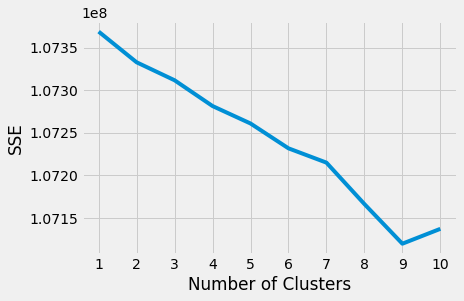

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Donde podemos ver que en $k=9$ encontramos el pico buscado.

De esta manera, ejecutamos nuestro algoritmo con $k=9$.

In [37]:
kmeans = KMeans(init='k-means++', n_clusters=9).fit(df_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.81683418e+00 -8.69565217e-03 -8.69565217e-03 ... -3.25521543e-02
  -4.84703493e-02 -2.88511254e-02]
 [ 1.57731602e-01 -8.69565217e-03 -8.69565217e-03 ... -3.25521543e-02
  -4.84703493e-02 -2.88511254e-02]
 [-6.19240255e-01 -8.69565217e-03 -8.69565217e-03 ... -3.25521543e-02
  -4.84703493e-02 -2.88511254e-02]
 ...
 [-1.09126982e-02  8.22974256e-05  8.22974256e-05 ...  3.08080227e-04
   4.58733271e-04  2.73052935e-04]
 [ 1.76897457e+00 -8.69565217e-03 -8.69565217e-03 ... -3.25521543e-02
  -4.84703493e-02 -2.88511254e-02]
 [-4.65029077e-01 -8.69565217e-03 -8.69565217e-03 ... -3.25521543e-02
  -4.84703493e-02 -2.88511254e-02]]


Realizamos nuestras predicciones.

In [38]:
y_pred = kmeans.predict(df_scaled)

Modificamos nuestro dataframe de tal forma que agregamos la nueva clasificación encontrada.

In [40]:
# Copiamos nuestro dataset original
clustered_df = update_df.copy()
# Agregamos los resultados obtenidos (agrupaciones) a este dataset.
clustered_df['Cluster'] = y_pred
# Visualizamos nuestro nuevo dataset con los valores de los resultados ordenados.
display(clustered_df.sort_values(by='Cluster'))

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
5815,Knight And Day,07/16/2010,Suspense,6.356028e+07,Tom Cruise,0
3342,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Kathy Griffin,0
3343,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Kristen Schaal,0
3345,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Mike Myers,0
3346,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Paul McCartney,0
...,...,...,...,...,...,...
7281,That's My Boy,07/20/2012,Comedy,1.811852e+07,Ian Ziering,8
7282,That's My Boy,07/20/2012,Comedy,1.811852e+07,James Caan,8
7283,That's My Boy,07/20/2012,Comedy,1.811852e+07,Leighton Meester,8
7285,That's My Boy,07/20/2012,Comedy,1.811852e+07,Susan Sarandon,8


In [41]:
print(clustered_df.groupby('Cluster').size())

Cluster
0       34
1        2
2        2
3        1
4       20
5       14
6    13102
7       38
8       13
dtype: int64


Como podemos apreciar, los actores se clasificaron en $9$ grupos distintos. Separamos cada Cluster en un data frame distinto para poder visualizar los resultados.

* Cluster $0$ ($34$ entradas)

In [46]:
df_0 = clustered_df.loc[clustered_df['Cluster'] == 0]

In [47]:
df_0

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
3329,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Amy Sedaris,0
3330,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Antonio Banderas,0
3331,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Cameron Diaz,0
3332,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Chris Miller,0
3333,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Conrad Vernon,0
3334,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Craig Robinson,0
3335,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Eddie Murphy,0
3336,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Eric Idle,0
3337,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Ian McShane,0
3338,Shrek Forever After,07/16/2010,Animation,3.717849e+08,Jane Lynch,0


* Cluster $1$ ($2$ entradas)

In [49]:
df_1 = clustered_df.loc[clustered_df['Cluster'] == 1]

In [50]:
df_1

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
88,Constantine,02/25/2005,Action,1.021020e+08,Corey Johnson,1
2144,"Bourne Ultimatum, The",09/07/2007,Action,5.295513e+07,Corey Johnson,1


* Cluster $2$ ($2$ entradas)

In [51]:
df_2 = clustered_df.loc[clustered_df['Cluster'] == 2]

In [52]:
df_2

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
1951,Little Miss Sunshine,11/24/2006,Comedy,4687629.0,Alan Arkin,2
8726,Stand Up Guys,05/10/2013,Comedy,2126580.4,Alan Arkin,2


* Cluster $3$ ($1$ entrada)

In [54]:
df_3 = clustered_df.loc[clustered_df['Cluster'] == 3]

In [55]:
df_3

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
6037,Cyrus,11/26/2010,Comedy,2846055.0,Tim Guinee,3


* Cluster $4$ ($20$ entradas)

In [57]:
df_4 = clustered_df.loc[clustered_df['Cluster'] == 4]

In [58]:
df_4

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
9340,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Ana de la Reguera,4
9341,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Channing Tatum,4
9342,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Cheech Marin,4
9343,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Christina Applegate,4
9344,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Danny Trejo,4
9345,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Diego Luna,4
9346,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Eugenio Derbez,4
9347,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Gabriel Iglesias,4
9348,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Hector Elizondo,4
9349,"Book Of Life, The",10/16/2014,Animation,1.392131e+08,Ice Cube,4


* Cluster $5$ ($14$ entradas)

In [59]:
df_5 = clustered_df.loc[clustered_df['Cluster'] == 5]

In [60]:
df_5

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
11490,Taken 3,01/30/2015,Action,1.493257e+08,Al Sapienza,5
11491,Taken 3,01/30/2015,Action,1.493257e+08,Andrew Howard,5
11492,Taken 3,01/30/2015,Action,1.493257e+08,Dougray Scott,5
11493,Taken 3,01/30/2015,Action,1.493257e+08,Dylan Bruno,5
11494,Taken 3,01/30/2015,Action,1.493257e+08,Famke Janssen,5
11495,Taken 3,01/30/2015,Action,1.493257e+08,Forest Whitaker,5
11496,Taken 3,01/30/2015,Action,1.493257e+08,Jon Gries,5
11497,Taken 3,01/30/2015,Action,1.493257e+08,Jonny Weston,5
11498,Taken 3,01/30/2015,Action,1.493257e+08,Judi Beecher,5
11499,Taken 3,01/30/2015,Action,1.493257e+08,Leland Orser,5


* Cluster $6$ ($13102$ entradas)

In [62]:
df_6 = clustered_df.loc[clustered_df['Cluster'] == 6]

In [63]:
df_6

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
0,Prom Night,08/08/2008,Horror,16394856.0,Andrew Fiscella,6
1,Prom Night,08/08/2008,Horror,16394856.0,Brittany Snow,6
2,Prom Night,08/08/2008,Horror,16394856.0,Collins Pennie,6
3,Prom Night,08/08/2008,Horror,16394856.0,Idris Elba,6
4,Prom Night,08/08/2008,Horror,16394856.0,Jessica Stroup,6
...,...,...,...,...,...,...
13221,Tiempo de morir,09/09/2016,Western,21100.0,Blanca Sanchez,6
13222,Tiempo de morir,09/09/2016,Western,21100.0,Enrique Rocha,6
13223,Tiempo de morir,09/09/2016,Western,21100.0,Jorge Martinez de Hoyos,6
13224,Tiempo de morir,09/09/2016,Western,21100.0,Marga Lopez,6


* Cluster $7$ ($38$ entradas)

In [65]:
df_7 = clustered_df.loc[clustered_df['Cluster'] == 7]

In [66]:
df_7

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
555,Harry Potter And The Goblet Of Fire,11/18/2005,Adventure,2.255184e+08,Daniel Radcliffe,7
2122,Harry Potter & The Order Of The Phoenix,07/12/2007,Adventure,2.488718e+08,Daniel Radcliffe,7
2529,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Alan Rickman,7
2530,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Bonnie Wright,7
2531,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Daniel Radcliffe,7
2532,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Dave Legeno,7
2533,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,David Bradley,7
2534,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,David Thewlis,7
2535,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Devon Murray,7
2536,Harry Potter & The Half Blood Prince,07/16/2009,Adventure,2.519342e+08,Emma Watson,7


* Cluster $8$ ($13$ entradas)

In [67]:
df_8 = clustered_df.loc[clustered_df['Cluster'] == 1]

In [68]:
df_8

,Title,Release.Date,Primary.Genre,acum_real,Actors,Cluster
88,Constantine,02/25/2005,Action,1.021020e+08,Corey Johnson,1
2144,"Bourne Ultimatum, The",09/07/2007,Action,5.295513e+07,Corey Johnson,1


### Conclusiones 

Gracias al algoritmo **K-means** logramos agrupar a nuestros actores de una manera satisfactoria en $9$ grupos diferentes. Analizándo un poco las características de cada uno de los grupos, podemos notar que la agrupación no se hizo sólamente por actores (es decir, cada cluster no pertenece exclusivamente a un actor en particular), sino que también se tomó en cuenta la fecha (pues podemos ver que los Clusters conciden en fechas).

De esta forma, en un Cluster coinciden actores que participaron en películas en el mismo año. No notamos que coincida particularmente en género o accum_real (pues en un Cluster se pueden encontrar varios valores distintos). 